# Implementation in python
## Kernel Used: Bell Shaped


## Importing Libraries:

In [7]:
from scipy import linalg
from IPython.display import Image
from IPython.display import display
plt.style.use('seaborn-white')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import ceil

## Getting Estimated Values of Y with the selected kernel

## Defining the bell shaped kernel function - used for plotting later on

In [8]:
def kernel_function(xi,x0,tau= .005): 
    return np.exp( - (xi - x0)**2/(2*tau)   )

## Implementing the Locally weighted Linear Regression Algorithm

In [24]:
def implement_bellKern(x, y, tau = .005):
    predicted_val = np.zeros(len(x))    
    weight = np.array([np.exp(- (x - x[i])**2/(2*tau)) for i in range(len(x))])     
    for i in range(len(x)):
        weights = weight[:, i]
        b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
        A = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])
        theta = linalg.solve(A, b)
        predicted_val[i] = theta[0] + theta[1] * x[i] 

    return predicted_val

## Discerning estimated values

In [30]:
x = np.linspace(0,5,100)
noise = np.random.normal(loc = 0, scale = .5, size = 100)
y = np.sin(x * 2.5 * np.pi ) 
y_noise = y + noise

pred_val_bell = implement_bellKern(x,y)

# Plotting the Graph

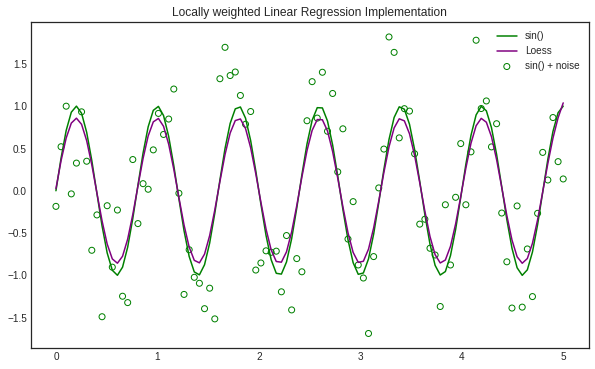

In [35]:
plt.figure(figsize=(10,6))
plt.plot(x,y,color = 'green', label = 'sin()')
plt.scatter(x,y_noise, facecolors = 'none', edgecolor = 'green', label = 'sin() + noise')
plt.plot(x,pred_val_bell,color = 'purple', label = 'Loess')
plt.legend()
plt.title('Locally weighted Linear Regression Implementation')
plt.show()